## 산탄데르 고객 만족 예측

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings("ignore")

cust_df = pd.read_csv("train_santander.csv",encoding="latin-1")
print("dataset shape:",cust_df.shape)
cust_df.head(3)

dataset shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [2]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [3]:
print(cust_df["TARGET"].value_counts())
unsatisfied_cnt = cust_df[cust_df["TARGET"]==1].TARGET.count()
total_cnt = cust_df.TARGET.count()
print("unsatisfied 비율은 {0:2f}".format((unsatisfied_cnt / total_cnt)))

0    73012
1     3008
Name: TARGET, dtype: int64
unsatisfied 비율은 0.039569


In [6]:
cust_df["var3"].replace(-999999, 2, inplace=True) # 다른 값과 차이가 많이 나기 때문에 변환.ㅠㅠ
cust_df.drop("ID", axis=1, inplace=True)

X_features = cust_df.iloc[:,:-1]
y_labels = cust_df.iloc[:,-1]
print("피처 데이터 shape:{0}".format(X_features.shape))

피처 데이터 shape:(76020, 369)


In [59]:
# 파마완 발췌
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.2, random_state=0)
train_cnt = y_train.count()
test_cnt = y_test.count()
print("학습 세트 Shape:{0}, 테스트 세트 Shape:{1}".format(X_train.shape, X_test.shape))

print("학습 세트 레이블 값 분포 비율")
print(y_train.value_counts()/train_cnt)
print("\n 테스트 세트 레이블 값 분포 비율")
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(60816, 369), 테스트 세트 Shape:(15204, 369)
학습 세트 레이블 값 분포 비율
0    0.960964
1    0.039036
Name: TARGET, dtype: float64

 테스트 세트 레이블 값 분포 비율
0    0.9583
1    0.0417
Name: TARGET, dtype: float64


In [60]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

xgb_clf = XGBClassifier(n_estimators=500, random_state = 156)

xgb_clf.fit(X_train, y_train, early_stopping_rounds=100,
           eval_metric="auc", eval_set=[(X_train, y_train),(X_test, y_test)])

[0]	validation_0-auc:0.82005	validation_1-auc:0.81157
[1]	validation_0-auc:0.83400	validation_1-auc:0.82452
[2]	validation_0-auc:0.83870	validation_1-auc:0.82745
[3]	validation_0-auc:0.84419	validation_1-auc:0.82922
[4]	validation_0-auc:0.84783	validation_1-auc:0.83298
[5]	validation_0-auc:0.85125	validation_1-auc:0.83500
[6]	validation_0-auc:0.85501	validation_1-auc:0.83653
[7]	validation_0-auc:0.85831	validation_1-auc:0.83782
[8]	validation_0-auc:0.86143	validation_1-auc:0.83802
[9]	validation_0-auc:0.86452	validation_1-auc:0.83914
[10]	validation_0-auc:0.86717	validation_1-auc:0.83954
[11]	validation_0-auc:0.87013	validation_1-auc:0.83983
[12]	validation_0-auc:0.87369	validation_1-auc:0.84033
[13]	validation_0-auc:0.87620	validation_1-auc:0.84055
[14]	validation_0-auc:0.87799	validation_1-auc:0.84135
[15]	validation_0-auc:0.88071	validation_1-auc:0.84117
[16]	validation_0-auc:0.88237	validation_1-auc:0.84101
[17]	validation_0-auc:0.88352	validation_1-auc:0.84071
[18]	validation_0-au

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=500,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=156,
              reg_alpha=0, reg_lambda=1, ...)

In [62]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100,eval_metric="auc",eval_set=evals,verbose=True)

[1]	valid_0's auc: 0.817384	valid_0's binary_logloss: 0.165046
[2]	valid_0's auc: 0.818903	valid_0's binary_logloss: 0.160006
[3]	valid_0's auc: 0.827707	valid_0's binary_logloss: 0.156323
[4]	valid_0's auc: 0.832155	valid_0's binary_logloss: 0.153463
[5]	valid_0's auc: 0.834677	valid_0's binary_logloss: 0.151256
[6]	valid_0's auc: 0.834093	valid_0's binary_logloss: 0.149427
[7]	valid_0's auc: 0.837046	valid_0's binary_logloss: 0.147961
[8]	valid_0's auc: 0.837838	valid_0's binary_logloss: 0.146591
[9]	valid_0's auc: 0.839435	valid_0's binary_logloss: 0.145455
[10]	valid_0's auc: 0.83973	valid_0's binary_logloss: 0.144486
[11]	valid_0's auc: 0.839799	valid_0's binary_logloss: 0.143769
[12]	valid_0's auc: 0.840034	valid_0's binary_logloss: 0.143146
[13]	valid_0's auc: 0.840271	valid_0's binary_logloss: 0.142533
[14]	valid_0's auc: 0.840342	valid_0's binary_logloss: 0.142036
[15]	valid_0's auc: 0.840928	valid_0's binary_logloss: 0.14161
[16]	valid_0's auc: 0.840337	valid_0's binary_loglo

LGBMClassifier(n_estimators=500)

In [63]:
xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1],average="macro")
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

ROC AUC: 0.8413


In [65]:
params = {"max_depth":[5,7], "min_child_weight":[1,3],"colsample_bytree":[0.5,0.75]}

gridcv = GridSearchCV(xgb_clf, param_grid = params, cv=3)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc",
          eval_set=[(X_train, y_train),(X_test, y_test)])

print("GridSearchCV 최적 파라미터:",gridcv.best_params_)

xgb_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1],average="macro")
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.70629	validation_1-auc:0.71552
[1]	validation_0-auc:0.79529	validation_1-auc:0.80747
[2]	validation_0-auc:0.79939	validation_1-auc:0.80662
[3]	validation_0-auc:0.80449	validation_1-auc:0.80694
[4]	validation_0-auc:0.80267	validation_1-auc:0.80336
[5]	validation_0-auc:0.82025	validation_1-auc:0.81848
[6]	validation_0-auc:0.82861	validation_1-auc:0.82517
[7]	validation_0-auc:0.84012	validation_1-auc:0.83344
[8]	validation_0-auc:0.84475	validation_1-auc:0.83705
[9]	validation_0-auc:0.84382	validation_1-auc:0.83378
[10]	validation_0-auc:0.84814	validation_1-auc:0.83654
[11]	validation_0-auc:0.84906	validation_1-auc:0.83434
[12]	validation_0-auc:0.85282	validation_1-auc:0.83742
[13]	validation_0-auc:0.85296	validation_1-auc:0.83479
[14]	validation_0-auc:0.85563	validation_1-auc:0.83806
[15]	validation_0-auc:0.85613	validation_1-auc:0.83747
[16]	validation_0-auc:0.85905	validation_1-auc:0.83818
[17]	validation_0-auc:0.86027	validation_1-auc:0.83860
[18]	validation_0-au

[35]	validation_0-auc:0.87266	validation_1-auc:0.83998
[36]	validation_0-auc:0.87326	validation_1-auc:0.84038
[37]	validation_0-auc:0.87348	validation_1-auc:0.84026
[38]	validation_0-auc:0.87452	validation_1-auc:0.84029
[39]	validation_0-auc:0.87463	validation_1-auc:0.84013
[40]	validation_0-auc:0.87474	validation_1-auc:0.84082
[41]	validation_0-auc:0.87518	validation_1-auc:0.84098
[42]	validation_0-auc:0.87567	validation_1-auc:0.84071
[43]	validation_0-auc:0.87594	validation_1-auc:0.84064
[44]	validation_0-auc:0.87626	validation_1-auc:0.84068
[45]	validation_0-auc:0.87646	validation_1-auc:0.84055
[46]	validation_0-auc:0.87652	validation_1-auc:0.84039
[47]	validation_0-auc:0.87658	validation_1-auc:0.84022
[48]	validation_0-auc:0.87665	validation_1-auc:0.84002
[49]	validation_0-auc:0.87673	validation_1-auc:0.83997
[50]	validation_0-auc:0.87702	validation_1-auc:0.84009
[51]	validation_0-auc:0.87755	validation_1-auc:0.84009
[52]	validation_0-auc:0.87783	validation_1-auc:0.83992
[53]	valid

[45]	validation_0-auc:0.89677	validation_1-auc:0.83275
[46]	validation_0-auc:0.89755	validation_1-auc:0.83196
[47]	validation_0-auc:0.89790	validation_1-auc:0.83189
[0]	validation_0-auc:0.71065	validation_1-auc:0.72162
[1]	validation_0-auc:0.81004	validation_1-auc:0.81744
[2]	validation_0-auc:0.81166	validation_1-auc:0.81353
[3]	validation_0-auc:0.81782	validation_1-auc:0.81079
[4]	validation_0-auc:0.81689	validation_1-auc:0.80562
[5]	validation_0-auc:0.83479	validation_1-auc:0.82049
[6]	validation_0-auc:0.84517	validation_1-auc:0.82760
[7]	validation_0-auc:0.85094	validation_1-auc:0.83378
[8]	validation_0-auc:0.85687	validation_1-auc:0.83678
[9]	validation_0-auc:0.85629	validation_1-auc:0.83338
[10]	validation_0-auc:0.86106	validation_1-auc:0.83592
[11]	validation_0-auc:0.86092	validation_1-auc:0.83293
[12]	validation_0-auc:0.86557	validation_1-auc:0.83586
[13]	validation_0-auc:0.86594	validation_1-auc:0.83273
[14]	validation_0-auc:0.86910	validation_1-auc:0.83553
[15]	validation_0-au

[17]	validation_0-auc:0.86342	validation_1-auc:0.83627
[18]	validation_0-auc:0.86476	validation_1-auc:0.83580
[19]	validation_0-auc:0.86534	validation_1-auc:0.83617
[20]	validation_0-auc:0.86562	validation_1-auc:0.83573
[21]	validation_0-auc:0.86658	validation_1-auc:0.83626
[22]	validation_0-auc:0.86673	validation_1-auc:0.83561
[23]	validation_0-auc:0.86737	validation_1-auc:0.83473
[24]	validation_0-auc:0.86765	validation_1-auc:0.83520
[25]	validation_0-auc:0.86786	validation_1-auc:0.83524
[26]	validation_0-auc:0.86818	validation_1-auc:0.83448
[27]	validation_0-auc:0.86853	validation_1-auc:0.83461
[28]	validation_0-auc:0.86939	validation_1-auc:0.83401
[29]	validation_0-auc:0.87039	validation_1-auc:0.83435
[30]	validation_0-auc:0.87049	validation_1-auc:0.83435
[31]	validation_0-auc:0.87084	validation_1-auc:0.83401
[32]	validation_0-auc:0.87181	validation_1-auc:0.83386
[33]	validation_0-auc:0.87197	validation_1-auc:0.83379
[34]	validation_0-auc:0.87226	validation_1-auc:0.83312
[35]	valid

[37]	validation_0-auc:0.87048	validation_1-auc:0.83523
[38]	validation_0-auc:0.87059	validation_1-auc:0.83527
[39]	validation_0-auc:0.87066	validation_1-auc:0.83516
[40]	validation_0-auc:0.87128	validation_1-auc:0.83490
[41]	validation_0-auc:0.87148	validation_1-auc:0.83502
[42]	validation_0-auc:0.87207	validation_1-auc:0.83513
[43]	validation_0-auc:0.87246	validation_1-auc:0.83481
[44]	validation_0-auc:0.87307	validation_1-auc:0.83452
[45]	validation_0-auc:0.87431	validation_1-auc:0.83401
[46]	validation_0-auc:0.87452	validation_1-auc:0.83353
[47]	validation_0-auc:0.87541	validation_1-auc:0.83373
[0]	validation_0-auc:0.71530	validation_1-auc:0.72310
[1]	validation_0-auc:0.81691	validation_1-auc:0.82146
[2]	validation_0-auc:0.81177	validation_1-auc:0.81507
[3]	validation_0-auc:0.81260	validation_1-auc:0.81317
[4]	validation_0-auc:0.82937	validation_1-auc:0.82683
[5]	validation_0-auc:0.83682	validation_1-auc:0.83015
[6]	validation_0-auc:0.84287	validation_1-auc:0.83500
[7]	validation_0-

[35]	validation_0-auc:0.89245	validation_1-auc:0.82763
[36]	validation_0-auc:0.89245	validation_1-auc:0.82777
[37]	validation_0-auc:0.89249	validation_1-auc:0.82761
[38]	validation_0-auc:0.89308	validation_1-auc:0.82705
[0]	validation_0-auc:0.71848	validation_1-auc:0.72285
[1]	validation_0-auc:0.82164	validation_1-auc:0.82158
[2]	validation_0-auc:0.81797	validation_1-auc:0.81498
[3]	validation_0-auc:0.82280	validation_1-auc:0.81345
[4]	validation_0-auc:0.84258	validation_1-auc:0.82822
[5]	validation_0-auc:0.85058	validation_1-auc:0.83418
[6]	validation_0-auc:0.85679	validation_1-auc:0.83776
[7]	validation_0-auc:0.86112	validation_1-auc:0.84137
[8]	validation_0-auc:0.86407	validation_1-auc:0.84227
[9]	validation_0-auc:0.86564	validation_1-auc:0.84123
[10]	validation_0-auc:0.86886	validation_1-auc:0.84127
[11]	validation_0-auc:0.87027	validation_1-auc:0.83960
[12]	validation_0-auc:0.87440	validation_1-auc:0.83935
[13]	validation_0-auc:0.87568	validation_1-auc:0.83794
[14]	validation_0-au

[20]	validation_0-auc:0.88201	validation_1-auc:0.83590
[21]	validation_0-auc:0.88241	validation_1-auc:0.83610
[22]	validation_0-auc:0.88340	validation_1-auc:0.83624
[23]	validation_0-auc:0.88417	validation_1-auc:0.83695
[24]	validation_0-auc:0.88450	validation_1-auc:0.83667
[25]	validation_0-auc:0.88534	validation_1-auc:0.83594
[26]	validation_0-auc:0.88657	validation_1-auc:0.83578
[27]	validation_0-auc:0.88697	validation_1-auc:0.83563
[28]	validation_0-auc:0.88735	validation_1-auc:0.83516
[29]	validation_0-auc:0.88748	validation_1-auc:0.83543
[30]	validation_0-auc:0.88797	validation_1-auc:0.83556
[31]	validation_0-auc:0.88828	validation_1-auc:0.83535
[32]	validation_0-auc:0.88852	validation_1-auc:0.83511
[33]	validation_0-auc:0.88902	validation_1-auc:0.83468
[34]	validation_0-auc:0.88927	validation_1-auc:0.83495
[35]	validation_0-auc:0.88959	validation_1-auc:0.83441
[36]	validation_0-auc:0.88994	validation_1-auc:0.83390
[37]	validation_0-auc:0.89024	validation_1-auc:0.83385
[38]	valid

In [66]:
xgb_clf = XGBClassifier(n_estimators=1000, random_state = 156, learning_rate=0.02, max_depth=7,
                       min_child_weight=1, colsample_by_tree=0.75,reg_alpha=0.03)

xgb_clf.fit(X_train, y_train, early_stopping_rounds=200,
           eval_metric="auc", eval_set=[(X_train, y_train),(X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1],average="macro")
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[02:13:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_by_tree" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.82446	validation_1-auc:0.81559
[1]	validation_0-auc:0.82725	validation_1-auc:0.81712
[2]	validation_0-auc:0.82942	validation_1-auc:0.81795
[3]	validation_0-auc:0.82935	validation_1-auc:0.81853
[4]	validation_0-auc:0.82923	validation_1-auc:0.81768
[5]	validation_0-auc:0.82955	validation_1-auc:0.81808
[6]	validation_0-auc:0.82977	validation_1-auc:0.81850
[7]	validation_0-auc:0.83003	validation_1-auc:0.81815
[8]	validation_0-auc:0.83012	validation_1-auc:0.81846
[9]	validation_0-auc:0.83024	validation_1-auc:0.81895
[10]	validation_0-auc:0.83110	vali

[141]	validation_0-auc:0.87722	validation_1-auc:0.84165
[142]	validation_0-auc:0.87754	validation_1-auc:0.84170
[143]	validation_0-auc:0.87778	validation_1-auc:0.84176
[144]	validation_0-auc:0.87814	validation_1-auc:0.84169
[145]	validation_0-auc:0.87830	validation_1-auc:0.84171
[146]	validation_0-auc:0.87857	validation_1-auc:0.84173
[147]	validation_0-auc:0.87878	validation_1-auc:0.84175
[148]	validation_0-auc:0.87902	validation_1-auc:0.84175
[149]	validation_0-auc:0.87926	validation_1-auc:0.84178
[150]	validation_0-auc:0.87943	validation_1-auc:0.84176
[151]	validation_0-auc:0.87966	validation_1-auc:0.84162
[152]	validation_0-auc:0.87989	validation_1-auc:0.84176
[153]	validation_0-auc:0.88010	validation_1-auc:0.84174
[154]	validation_0-auc:0.88028	validation_1-auc:0.84179
[155]	validation_0-auc:0.88050	validation_1-auc:0.84189
[156]	validation_0-auc:0.88072	validation_1-auc:0.84195
[157]	validation_0-auc:0.88091	validation_1-auc:0.84193
[158]	validation_0-auc:0.88112	validation_1-auc:

[288]	validation_0-auc:0.90289	validation_1-auc:0.84264
[289]	validation_0-auc:0.90293	validation_1-auc:0.84263
[290]	validation_0-auc:0.90302	validation_1-auc:0.84256
[291]	validation_0-auc:0.90308	validation_1-auc:0.84266
[292]	validation_0-auc:0.90313	validation_1-auc:0.84259
[293]	validation_0-auc:0.90320	validation_1-auc:0.84255
[294]	validation_0-auc:0.90332	validation_1-auc:0.84254
[295]	validation_0-auc:0.90341	validation_1-auc:0.84250
[296]	validation_0-auc:0.90347	validation_1-auc:0.84249
[297]	validation_0-auc:0.90360	validation_1-auc:0.84249
[298]	validation_0-auc:0.90367	validation_1-auc:0.84246
[299]	validation_0-auc:0.90371	validation_1-auc:0.84240
[300]	validation_0-auc:0.90377	validation_1-auc:0.84233
[301]	validation_0-auc:0.90380	validation_1-auc:0.84229
[302]	validation_0-auc:0.90391	validation_1-auc:0.84227
[303]	validation_0-auc:0.90401	validation_1-auc:0.84230
[304]	validation_0-auc:0.90410	validation_1-auc:0.84230
[305]	validation_0-auc:0.90428	validation_1-auc:

[435]	validation_0-auc:0.91239	validation_1-auc:0.84161
ROC AUC: 0.8436


In [67]:
lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1],average="macro")
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

ROC AUC: 0.8409


In [68]:
from sklearn.model_selection import GridSearchCV

lgbm_clf = LGBMClassifier(n_estimators=200)

params = {"num_leaves":[32,64],"max_depth":[128,160], "min_child_samples":[60,100],"subample":[0.8,1]}

gridcv = GridSearchCV(lgbm_clf, param_grid = params, cv=3)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc",
          eval_set=[(X_train, y_train),(X_test, y_test)])

print("GridSearchCV 최적 파라미터:",gridcv.best_params_)

lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1],average="macro")
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[LightGBM] [Warning] Unknown parameter: subample
[1]	valid_0's auc: 0.820235	valid_0's binary_logloss: 0.156085	valid_1's auc: 0.81613	valid_1's binary_logloss: 0.164992
[2]	valid_0's auc: 0.825778	valid_0's binary_logloss: 0.150951	valid_1's auc: 0.821835	valid_1's binary_logloss: 0.159874
[3]	valid_0's auc: 0.832262	valid_0's binary_logloss: 0.147158	valid_1's auc: 0.826533	valid_1's binary_logloss: 0.156346
[4]	valid_0's auc: 0.83865	valid_0's binary_logloss: 0.144126	valid_1's auc: 0.833166	valid_1's binary_logloss: 0.1534
[5]	valid_0's auc: 0.842822	valid_0's binary_logloss: 0.141725	valid_1's auc: 0.836448	valid_1's binary_logloss: 0.151167
[6]	valid_0's auc: 0.844702	valid_0's binary_logloss: 0.139642	valid_1's auc: 0.837094	valid_1's binary_logloss: 0.149356
[7]	valid_0's auc: 0.847144	valid_0's binary_logloss: 0.13794	valid_1's auc: 0.837965	valid_1's binary_logloss: 0.147853
[8]	valid_0's auc: 0.848277	valid_0's binary_logloss: 0.136499	valid_1's auc: 0.837663	valid_1's binar

[LightGBM] [Warning] Unknown parameter: subample
[1]	valid_0's auc: 0.821645	valid_0's binary_logloss: 0.156528	valid_1's auc: 0.81857	valid_1's binary_logloss: 0.165101
[2]	valid_0's auc: 0.827488	valid_0's binary_logloss: 0.151189	valid_1's auc: 0.822299	valid_1's binary_logloss: 0.160072
[3]	valid_0's auc: 0.837855	valid_0's binary_logloss: 0.147263	valid_1's auc: 0.829855	valid_1's binary_logloss: 0.156527
[4]	valid_0's auc: 0.840063	valid_0's binary_logloss: 0.144261	valid_1's auc: 0.833088	valid_1's binary_logloss: 0.153446
[5]	valid_0's auc: 0.842802	valid_0's binary_logloss: 0.141691	valid_1's auc: 0.834541	valid_1's binary_logloss: 0.151144
[6]	valid_0's auc: 0.844	valid_0's binary_logloss: 0.139654	valid_1's auc: 0.834542	valid_1's binary_logloss: 0.149333
[7]	valid_0's auc: 0.845838	valid_0's binary_logloss: 0.138002	valid_1's auc: 0.835645	valid_1's binary_logloss: 0.147676
[8]	valid_0's auc: 0.846869	valid_0's binary_logloss: 0.136628	valid_1's auc: 0.836118	valid_1's bina

[24]	valid_0's auc: 0.868612	valid_0's binary_logloss: 0.126061	valid_1's auc: 0.833336	valid_1's binary_logloss: 0.140824
[25]	valid_0's auc: 0.869224	valid_0's binary_logloss: 0.125753	valid_1's auc: 0.833428	valid_1's binary_logloss: 0.140793
[26]	valid_0's auc: 0.870183	valid_0's binary_logloss: 0.125414	valid_1's auc: 0.83333	valid_1's binary_logloss: 0.140724
[27]	valid_0's auc: 0.870926	valid_0's binary_logloss: 0.125123	valid_1's auc: 0.832503	valid_1's binary_logloss: 0.140772
[28]	valid_0's auc: 0.872431	valid_0's binary_logloss: 0.124766	valid_1's auc: 0.832826	valid_1's binary_logloss: 0.140685
[29]	valid_0's auc: 0.873397	valid_0's binary_logloss: 0.124495	valid_1's auc: 0.833175	valid_1's binary_logloss: 0.140604
[30]	valid_0's auc: 0.87475	valid_0's binary_logloss: 0.12417	valid_1's auc: 0.833614	valid_1's binary_logloss: 0.140497
[31]	valid_0's auc: 0.875407	valid_0's binary_logloss: 0.12389	valid_1's auc: 0.833706	valid_1's binary_logloss: 0.140428
[32]	valid_0's auc: 

[26]	valid_0's auc: 0.870325	valid_0's binary_logloss: 0.125518	valid_1's auc: 0.839261	valid_1's binary_logloss: 0.139524
[27]	valid_0's auc: 0.871488	valid_0's binary_logloss: 0.125147	valid_1's auc: 0.839671	valid_1's binary_logloss: 0.139365
[28]	valid_0's auc: 0.87235	valid_0's binary_logloss: 0.12484	valid_1's auc: 0.840114	valid_1's binary_logloss: 0.139236
[29]	valid_0's auc: 0.872991	valid_0's binary_logloss: 0.124593	valid_1's auc: 0.839491	valid_1's binary_logloss: 0.139271
[30]	valid_0's auc: 0.874129	valid_0's binary_logloss: 0.124312	valid_1's auc: 0.839589	valid_1's binary_logloss: 0.13918
[31]	valid_0's auc: 0.875305	valid_0's binary_logloss: 0.123988	valid_1's auc: 0.839441	valid_1's binary_logloss: 0.139184
[32]	valid_0's auc: 0.875943	valid_0's binary_logloss: 0.123748	valid_1's auc: 0.839268	valid_1's binary_logloss: 0.13919
[33]	valid_0's auc: 0.876575	valid_0's binary_logloss: 0.123484	valid_1's auc: 0.839549	valid_1's binary_logloss: 0.139075
[34]	valid_0's auc: 

[LightGBM] [Warning] Unknown parameter: subample
[1]	valid_0's auc: 0.833054	valid_0's binary_logloss: 0.15572	valid_1's auc: 0.817048	valid_1's binary_logloss: 0.165036
[2]	valid_0's auc: 0.841397	valid_0's binary_logloss: 0.149862	valid_1's auc: 0.82157	valid_1's binary_logloss: 0.159575
[3]	valid_0's auc: 0.849058	valid_0's binary_logloss: 0.145662	valid_1's auc: 0.829866	valid_1's binary_logloss: 0.155774
[4]	valid_0's auc: 0.854301	valid_0's binary_logloss: 0.142356	valid_1's auc: 0.832415	valid_1's binary_logloss: 0.152936
[5]	valid_0's auc: 0.858045	valid_0's binary_logloss: 0.139697	valid_1's auc: 0.834554	valid_1's binary_logloss: 0.150635
[6]	valid_0's auc: 0.860767	valid_0's binary_logloss: 0.137458	valid_1's auc: 0.834885	valid_1's binary_logloss: 0.148761
[7]	valid_0's auc: 0.863011	valid_0's binary_logloss: 0.135522	valid_1's auc: 0.835812	valid_1's binary_logloss: 0.147245
[8]	valid_0's auc: 0.864923	valid_0's binary_logloss: 0.133792	valid_1's auc: 0.836656	valid_1's bi

[28]	valid_0's auc: 0.887621	valid_0's binary_logloss: 0.119008	valid_1's auc: 0.835594	valid_1's binary_logloss: 0.140532
[29]	valid_0's auc: 0.888965	valid_0's binary_logloss: 0.118547	valid_1's auc: 0.835464	valid_1's binary_logloss: 0.140508
[30]	valid_0's auc: 0.889898	valid_0's binary_logloss: 0.118139	valid_1's auc: 0.83577	valid_1's binary_logloss: 0.140461
[31]	valid_0's auc: 0.890896	valid_0's binary_logloss: 0.117734	valid_1's auc: 0.835475	valid_1's binary_logloss: 0.140463
[32]	valid_0's auc: 0.892374	valid_0's binary_logloss: 0.1173	valid_1's auc: 0.835364	valid_1's binary_logloss: 0.140506
[33]	valid_0's auc: 0.893164	valid_0's binary_logloss: 0.116978	valid_1's auc: 0.835865	valid_1's binary_logloss: 0.14041
[34]	valid_0's auc: 0.893848	valid_0's binary_logloss: 0.11662	valid_1's auc: 0.836021	valid_1's binary_logloss: 0.140353
[35]	valid_0's auc: 0.894232	valid_0's binary_logloss: 0.116323	valid_1's auc: 0.8359	valid_1's binary_logloss: 0.140396
[36]	valid_0's auc: 0.8

[LightGBM] [Warning] Unknown parameter: subample
[1]	valid_0's auc: 0.833054	valid_0's binary_logloss: 0.15572	valid_1's auc: 0.817048	valid_1's binary_logloss: 0.165036
[2]	valid_0's auc: 0.841397	valid_0's binary_logloss: 0.149862	valid_1's auc: 0.82157	valid_1's binary_logloss: 0.159575
[3]	valid_0's auc: 0.849058	valid_0's binary_logloss: 0.145662	valid_1's auc: 0.829866	valid_1's binary_logloss: 0.155774
[4]	valid_0's auc: 0.854301	valid_0's binary_logloss: 0.142356	valid_1's auc: 0.832415	valid_1's binary_logloss: 0.152936
[5]	valid_0's auc: 0.858045	valid_0's binary_logloss: 0.139697	valid_1's auc: 0.834554	valid_1's binary_logloss: 0.150635
[6]	valid_0's auc: 0.860767	valid_0's binary_logloss: 0.137458	valid_1's auc: 0.834885	valid_1's binary_logloss: 0.148761
[7]	valid_0's auc: 0.863011	valid_0's binary_logloss: 0.135522	valid_1's auc: 0.835812	valid_1's binary_logloss: 0.147245
[8]	valid_0's auc: 0.864923	valid_0's binary_logloss: 0.133792	valid_1's auc: 0.836656	valid_1's bi

[32]	valid_0's auc: 0.892374	valid_0's binary_logloss: 0.1173	valid_1's auc: 0.835364	valid_1's binary_logloss: 0.140506
[33]	valid_0's auc: 0.893164	valid_0's binary_logloss: 0.116978	valid_1's auc: 0.835865	valid_1's binary_logloss: 0.14041
[34]	valid_0's auc: 0.893848	valid_0's binary_logloss: 0.11662	valid_1's auc: 0.836021	valid_1's binary_logloss: 0.140353
[35]	valid_0's auc: 0.894232	valid_0's binary_logloss: 0.116323	valid_1's auc: 0.8359	valid_1's binary_logloss: 0.140396
[36]	valid_0's auc: 0.895003	valid_0's binary_logloss: 0.115986	valid_1's auc: 0.835855	valid_1's binary_logloss: 0.140416
[37]	valid_0's auc: 0.895898	valid_0's binary_logloss: 0.115609	valid_1's auc: 0.836185	valid_1's binary_logloss: 0.140369
[38]	valid_0's auc: 0.896459	valid_0's binary_logloss: 0.11527	valid_1's auc: 0.835754	valid_1's binary_logloss: 0.140443
[39]	valid_0's auc: 0.897377	valid_0's binary_logloss: 0.114873	valid_1's auc: 0.835638	valid_1's binary_logloss: 0.140474
[40]	valid_0's auc: 0.8

[21]	valid_0's auc: 0.863758	valid_0's binary_logloss: 0.127907	valid_1's auc: 0.838127	valid_1's binary_logloss: 0.139858
[22]	valid_0's auc: 0.864635	valid_0's binary_logloss: 0.127525	valid_1's auc: 0.838331	valid_1's binary_logloss: 0.139696
[23]	valid_0's auc: 0.865866	valid_0's binary_logloss: 0.127143	valid_1's auc: 0.837841	valid_1's binary_logloss: 0.139625
[24]	valid_0's auc: 0.867054	valid_0's binary_logloss: 0.126749	valid_1's auc: 0.838187	valid_1's binary_logloss: 0.139526
[25]	valid_0's auc: 0.867553	valid_0's binary_logloss: 0.126476	valid_1's auc: 0.838308	valid_1's binary_logloss: 0.13949
[26]	valid_0's auc: 0.868108	valid_0's binary_logloss: 0.126164	valid_1's auc: 0.838035	valid_1's binary_logloss: 0.139426
[27]	valid_0's auc: 0.869014	valid_0's binary_logloss: 0.125868	valid_1's auc: 0.837545	valid_1's binary_logloss: 0.139445
[28]	valid_0's auc: 0.869797	valid_0's binary_logloss: 0.12559	valid_1's auc: 0.837894	valid_1's binary_logloss: 0.139419
[29]	valid_0's auc

[60]	valid_0's auc: 0.886208	valid_0's binary_logloss: 0.119263	valid_1's auc: 0.83744	valid_1's binary_logloss: 0.140079
[61]	valid_0's auc: 0.886458	valid_0's binary_logloss: 0.119118	valid_1's auc: 0.837349	valid_1's binary_logloss: 0.140059
[LightGBM] [Warning] Unknown parameter: subample
[1]	valid_0's auc: 0.824873	valid_0's binary_logloss: 0.156222	valid_1's auc: 0.817791	valid_1's binary_logloss: 0.165072
[2]	valid_0's auc: 0.828725	valid_0's binary_logloss: 0.151244	valid_1's auc: 0.822586	valid_1's binary_logloss: 0.160253
[3]	valid_0's auc: 0.83594	valid_0's binary_logloss: 0.147423	valid_1's auc: 0.828474	valid_1's binary_logloss: 0.156542
[4]	valid_0's auc: 0.839489	valid_0's binary_logloss: 0.144426	valid_1's auc: 0.831396	valid_1's binary_logloss: 0.153706
[5]	valid_0's auc: 0.843358	valid_0's binary_logloss: 0.142067	valid_1's auc: 0.833466	valid_1's binary_logloss: 0.151399
[6]	valid_0's auc: 0.845601	valid_0's binary_logloss: 0.14009	valid_1's auc: 0.833857	valid_1's b

[LightGBM] [Warning] Unknown parameter: subample
[1]	valid_0's auc: 0.821427	valid_0's binary_logloss: 0.156592	valid_1's auc: 0.81711	valid_1's binary_logloss: 0.165273
[2]	valid_0's auc: 0.827893	valid_0's binary_logloss: 0.151336	valid_1's auc: 0.820533	valid_1's binary_logloss: 0.160243
[3]	valid_0's auc: 0.83753	valid_0's binary_logloss: 0.147487	valid_1's auc: 0.82841	valid_1's binary_logloss: 0.156547
[4]	valid_0's auc: 0.84038	valid_0's binary_logloss: 0.144428	valid_1's auc: 0.8313	valid_1's binary_logloss: 0.153575
[5]	valid_0's auc: 0.842945	valid_0's binary_logloss: 0.142089	valid_1's auc: 0.833579	valid_1's binary_logloss: 0.151354
[6]	valid_0's auc: 0.843246	valid_0's binary_logloss: 0.140186	valid_1's auc: 0.833781	valid_1's binary_logloss: 0.14953
[7]	valid_0's auc: 0.844301	valid_0's binary_logloss: 0.138471	valid_1's auc: 0.834317	valid_1's binary_logloss: 0.147954
[8]	valid_0's auc: 0.846945	valid_0's binary_logloss: 0.137078	valid_1's auc: 0.834895	valid_1's binary_

[18]	valid_0's auc: 0.874047	valid_0's binary_logloss: 0.125646	valid_1's auc: 0.831917	valid_1's binary_logloss: 0.141748
[19]	valid_0's auc: 0.875336	valid_0's binary_logloss: 0.125072	valid_1's auc: 0.831274	valid_1's binary_logloss: 0.141658
[20]	valid_0's auc: 0.876959	valid_0's binary_logloss: 0.124484	valid_1's auc: 0.831275	valid_1's binary_logloss: 0.141511
[21]	valid_0's auc: 0.878049	valid_0's binary_logloss: 0.123928	valid_1's auc: 0.830813	valid_1's binary_logloss: 0.141459
[22]	valid_0's auc: 0.878905	valid_0's binary_logloss: 0.123447	valid_1's auc: 0.83012	valid_1's binary_logloss: 0.141449
[23]	valid_0's auc: 0.879827	valid_0's binary_logloss: 0.12295	valid_1's auc: 0.829554	valid_1's binary_logloss: 0.141492
[24]	valid_0's auc: 0.880692	valid_0's binary_logloss: 0.122479	valid_1's auc: 0.829256	valid_1's binary_logloss: 0.141487
[25]	valid_0's auc: 0.881715	valid_0's binary_logloss: 0.121994	valid_1's auc: 0.829326	valid_1's binary_logloss: 0.141362
[26]	valid_0's auc

[15]	valid_0's auc: 0.870553	valid_0's binary_logloss: 0.127746	valid_1's auc: 0.833467	valid_1's binary_logloss: 0.142302
[16]	valid_0's auc: 0.871816	valid_0's binary_logloss: 0.126943	valid_1's auc: 0.83329	valid_1's binary_logloss: 0.142022
[17]	valid_0's auc: 0.872964	valid_0's binary_logloss: 0.126266	valid_1's auc: 0.83279	valid_1's binary_logloss: 0.141891
[18]	valid_0's auc: 0.874047	valid_0's binary_logloss: 0.125646	valid_1's auc: 0.831917	valid_1's binary_logloss: 0.141748
[19]	valid_0's auc: 0.875336	valid_0's binary_logloss: 0.125072	valid_1's auc: 0.831274	valid_1's binary_logloss: 0.141658
[20]	valid_0's auc: 0.876959	valid_0's binary_logloss: 0.124484	valid_1's auc: 0.831275	valid_1's binary_logloss: 0.141511
[21]	valid_0's auc: 0.878049	valid_0's binary_logloss: 0.123928	valid_1's auc: 0.830813	valid_1's binary_logloss: 0.141459
[22]	valid_0's auc: 0.878905	valid_0's binary_logloss: 0.123447	valid_1's auc: 0.83012	valid_1's binary_logloss: 0.141449
[23]	valid_0's auc:

[LightGBM] [Warning] Unknown parameter: subample
[1]	valid_0's auc: 0.834724	valid_0's binary_logloss: 0.15607	valid_1's auc: 0.822983	valid_1's binary_logloss: 0.165104
[2]	valid_0's auc: 0.842835	valid_0's binary_logloss: 0.150494	valid_1's auc: 0.830472	valid_1's binary_logloss: 0.159671
[3]	valid_0's auc: 0.847187	valid_0's binary_logloss: 0.146306	valid_1's auc: 0.830873	valid_1's binary_logloss: 0.155985
[4]	valid_0's auc: 0.850394	valid_0's binary_logloss: 0.143088	valid_1's auc: 0.830975	valid_1's binary_logloss: 0.15321
[5]	valid_0's auc: 0.853379	valid_0's binary_logloss: 0.140508	valid_1's auc: 0.832135	valid_1's binary_logloss: 0.150854
[6]	valid_0's auc: 0.855463	valid_0's binary_logloss: 0.138297	valid_1's auc: 0.833116	valid_1's binary_logloss: 0.149013
[7]	valid_0's auc: 0.856723	valid_0's binary_logloss: 0.136504	valid_1's auc: 0.833811	valid_1's binary_logloss: 0.147577
[8]	valid_0's auc: 0.858076	valid_0's binary_logloss: 0.13495	valid_1's auc: 0.835315	valid_1's bin

[21]	valid_0's auc: 0.866472	valid_0's binary_logloss: 0.127165	valid_1's auc: 0.834176	valid_1's binary_logloss: 0.141041
[22]	valid_0's auc: 0.867055	valid_0's binary_logloss: 0.126777	valid_1's auc: 0.834173	valid_1's binary_logloss: 0.140887
[23]	valid_0's auc: 0.867726	valid_0's binary_logloss: 0.12643	valid_1's auc: 0.833577	valid_1's binary_logloss: 0.140909
[24]	valid_0's auc: 0.868612	valid_0's binary_logloss: 0.126061	valid_1's auc: 0.833336	valid_1's binary_logloss: 0.140824
[25]	valid_0's auc: 0.869224	valid_0's binary_logloss: 0.125753	valid_1's auc: 0.833428	valid_1's binary_logloss: 0.140793
[26]	valid_0's auc: 0.870183	valid_0's binary_logloss: 0.125414	valid_1's auc: 0.83333	valid_1's binary_logloss: 0.140724
[27]	valid_0's auc: 0.870926	valid_0's binary_logloss: 0.125123	valid_1's auc: 0.832503	valid_1's binary_logloss: 0.140772
[28]	valid_0's auc: 0.872431	valid_0's binary_logloss: 0.124766	valid_1's auc: 0.832826	valid_1's binary_logloss: 0.140685
[29]	valid_0's auc

[20]	valid_0's auc: 0.865797	valid_0's binary_logloss: 0.127679	valid_1's auc: 0.838788	valid_1's binary_logloss: 0.140332
[21]	valid_0's auc: 0.866561	valid_0's binary_logloss: 0.127235	valid_1's auc: 0.839171	valid_1's binary_logloss: 0.140108
[22]	valid_0's auc: 0.867237	valid_0's binary_logloss: 0.12688	valid_1's auc: 0.839213	valid_1's binary_logloss: 0.13991
[23]	valid_0's auc: 0.867894	valid_0's binary_logloss: 0.126519	valid_1's auc: 0.839641	valid_1's binary_logloss: 0.139745
[24]	valid_0's auc: 0.868501	valid_0's binary_logloss: 0.126192	valid_1's auc: 0.840025	valid_1's binary_logloss: 0.139593
[25]	valid_0's auc: 0.869311	valid_0's binary_logloss: 0.125838	valid_1's auc: 0.839961	valid_1's binary_logloss: 0.139531
[26]	valid_0's auc: 0.870325	valid_0's binary_logloss: 0.125518	valid_1's auc: 0.839261	valid_1's binary_logloss: 0.139524
[27]	valid_0's auc: 0.871488	valid_0's binary_logloss: 0.125147	valid_1's auc: 0.839671	valid_1's binary_logloss: 0.139365
[28]	valid_0's auc

[37]	valid_0's auc: 0.878762	valid_0's binary_logloss: 0.122514	valid_1's auc: 0.832581	valid_1's binary_logloss: 0.140533
[LightGBM] [Warning] Unknown parameter: subample
[1]	valid_0's auc: 0.814371	valid_0's binary_logloss: 0.156452	valid_1's auc: 0.813175	valid_1's binary_logloss: 0.165418
[2]	valid_0's auc: 0.827277	valid_0's binary_logloss: 0.151084	valid_1's auc: 0.819635	valid_1's binary_logloss: 0.160159
[3]	valid_0's auc: 0.837033	valid_0's binary_logloss: 0.14722	valid_1's auc: 0.828221	valid_1's binary_logloss: 0.156492
[4]	valid_0's auc: 0.840167	valid_0's binary_logloss: 0.14423	valid_1's auc: 0.830942	valid_1's binary_logloss: 0.153586
[5]	valid_0's auc: 0.842499	valid_0's binary_logloss: 0.141721	valid_1's auc: 0.833301	valid_1's binary_logloss: 0.151219
[6]	valid_0's auc: 0.845403	valid_0's binary_logloss: 0.139708	valid_1's auc: 0.836412	valid_1's binary_logloss: 0.149312
[7]	valid_0's auc: 0.848049	valid_0's binary_logloss: 0.138024	valid_1's auc: 0.836054	valid_1's b

[40]	valid_0's auc: 0.881604	valid_0's binary_logloss: 0.121603	valid_1's auc: 0.839204	valid_1's binary_logloss: 0.139119
[41]	valid_0's auc: 0.882159	valid_0's binary_logloss: 0.121355	valid_1's auc: 0.839277	valid_1's binary_logloss: 0.139091
[42]	valid_0's auc: 0.882757	valid_0's binary_logloss: 0.121116	valid_1's auc: 0.838964	valid_1's binary_logloss: 0.139133
[43]	valid_0's auc: 0.883143	valid_0's binary_logloss: 0.120918	valid_1's auc: 0.839024	valid_1's binary_logloss: 0.139124
[44]	valid_0's auc: 0.883697	valid_0's binary_logloss: 0.12072	valid_1's auc: 0.838652	valid_1's binary_logloss: 0.139203
[45]	valid_0's auc: 0.884292	valid_0's binary_logloss: 0.120482	valid_1's auc: 0.839016	valid_1's binary_logloss: 0.139124
[46]	valid_0's auc: 0.884969	valid_0's binary_logloss: 0.120266	valid_1's auc: 0.838683	valid_1's binary_logloss: 0.139184
[47]	valid_0's auc: 0.8853	valid_0's binary_logloss: 0.120089	valid_1's auc: 0.838624	valid_1's binary_logloss: 0.139193
[48]	valid_0's auc:

[16]	valid_0's auc: 0.876399	valid_0's binary_logloss: 0.125331	valid_1's auc: 0.83478	valid_1's binary_logloss: 0.141245
[17]	valid_0's auc: 0.877465	valid_0's binary_logloss: 0.124655	valid_1's auc: 0.834621	valid_1's binary_logloss: 0.141028
[18]	valid_0's auc: 0.878935	valid_0's binary_logloss: 0.123944	valid_1's auc: 0.834165	valid_1's binary_logloss: 0.140935
[19]	valid_0's auc: 0.88046	valid_0's binary_logloss: 0.123313	valid_1's auc: 0.834629	valid_1's binary_logloss: 0.140738
[20]	valid_0's auc: 0.881517	valid_0's binary_logloss: 0.12269	valid_1's auc: 0.8347	valid_1's binary_logloss: 0.140611
[21]	valid_0's auc: 0.882464	valid_0's binary_logloss: 0.122095	valid_1's auc: 0.834656	valid_1's binary_logloss: 0.140487
[22]	valid_0's auc: 0.883744	valid_0's binary_logloss: 0.121504	valid_1's auc: 0.834562	valid_1's binary_logloss: 0.140328
[23]	valid_0's auc: 0.885301	valid_0's binary_logloss: 0.12091	valid_1's auc: 0.835278	valid_1's binary_logloss: 0.140199
[24]	valid_0's auc: 0.

[53]	valid_0's auc: 0.904868	valid_0's binary_logloss: 0.110853	valid_1's auc: 0.834751	valid_1's binary_logloss: 0.14108
[54]	valid_0's auc: 0.905166	valid_0's binary_logloss: 0.110627	valid_1's auc: 0.83411	valid_1's binary_logloss: 0.141282
[55]	valid_0's auc: 0.905665	valid_0's binary_logloss: 0.110375	valid_1's auc: 0.833739	valid_1's binary_logloss: 0.141413
[LightGBM] [Warning] Unknown parameter: subample
[1]	valid_0's auc: 0.832891	valid_0's binary_logloss: 0.155302	valid_1's auc: 0.818851	valid_1's binary_logloss: 0.164826
[2]	valid_0's auc: 0.84519	valid_0's binary_logloss: 0.149727	valid_1's auc: 0.827144	valid_1's binary_logloss: 0.159879
[3]	valid_0's auc: 0.848018	valid_0's binary_logloss: 0.145627	valid_1's auc: 0.826851	valid_1's binary_logloss: 0.15631
[4]	valid_0's auc: 0.851096	valid_0's binary_logloss: 0.142423	valid_1's auc: 0.83073	valid_1's binary_logloss: 0.1534
[5]	valid_0's auc: 0.854735	valid_0's binary_logloss: 0.139746	valid_1's auc: 0.832753	valid_1's bina

[27]	valid_0's auc: 0.889589	valid_0's binary_logloss: 0.119012	valid_1's auc: 0.836951	valid_1's binary_logloss: 0.139843
[28]	valid_0's auc: 0.890552	valid_0's binary_logloss: 0.118602	valid_1's auc: 0.836524	valid_1's binary_logloss: 0.139871
[29]	valid_0's auc: 0.891402	valid_0's binary_logloss: 0.118166	valid_1's auc: 0.836264	valid_1's binary_logloss: 0.139884
[30]	valid_0's auc: 0.891982	valid_0's binary_logloss: 0.117805	valid_1's auc: 0.835959	valid_1's binary_logloss: 0.139937
[31]	valid_0's auc: 0.893185	valid_0's binary_logloss: 0.117392	valid_1's auc: 0.836384	valid_1's binary_logloss: 0.13992
[32]	valid_0's auc: 0.894065	valid_0's binary_logloss: 0.117017	valid_1's auc: 0.836341	valid_1's binary_logloss: 0.139888
[33]	valid_0's auc: 0.894791	valid_0's binary_logloss: 0.116671	valid_1's auc: 0.836753	valid_1's binary_logloss: 0.139812
[34]	valid_0's auc: 0.895313	valid_0's binary_logloss: 0.116321	valid_1's auc: 0.836733	valid_1's binary_logloss: 0.139826
[35]	valid_0's au

[37]	valid_0's auc: 0.875657	valid_0's binary_logloss: 0.123447	valid_1's auc: 0.838519	valid_1's binary_logloss: 0.139109
[LightGBM] [Warning] Unknown parameter: subample
[1]	valid_0's auc: 0.821427	valid_0's binary_logloss: 0.156592	valid_1's auc: 0.81711	valid_1's binary_logloss: 0.165273
[2]	valid_0's auc: 0.827893	valid_0's binary_logloss: 0.151336	valid_1's auc: 0.820533	valid_1's binary_logloss: 0.160243
[3]	valid_0's auc: 0.83753	valid_0's binary_logloss: 0.147487	valid_1's auc: 0.82841	valid_1's binary_logloss: 0.156547
[4]	valid_0's auc: 0.84038	valid_0's binary_logloss: 0.144428	valid_1's auc: 0.8313	valid_1's binary_logloss: 0.153575
[5]	valid_0's auc: 0.842945	valid_0's binary_logloss: 0.142089	valid_1's auc: 0.833579	valid_1's binary_logloss: 0.151354
[6]	valid_0's auc: 0.843246	valid_0's binary_logloss: 0.140186	valid_1's auc: 0.833781	valid_1's binary_logloss: 0.14953
[7]	valid_0's auc: 0.844301	valid_0's binary_logloss: 0.138471	valid_1's auc: 0.834317	valid_1's binary

[21]	valid_0's auc: 0.863262	valid_0's binary_logloss: 0.128069	valid_1's auc: 0.834616	valid_1's binary_logloss: 0.14086
[22]	valid_0's auc: 0.864655	valid_0's binary_logloss: 0.127684	valid_1's auc: 0.834363	valid_1's binary_logloss: 0.140766
[23]	valid_0's auc: 0.865247	valid_0's binary_logloss: 0.127349	valid_1's auc: 0.834317	valid_1's binary_logloss: 0.140688
[24]	valid_0's auc: 0.865882	valid_0's binary_logloss: 0.12704	valid_1's auc: 0.833543	valid_1's binary_logloss: 0.14068
[25]	valid_0's auc: 0.867496	valid_0's binary_logloss: 0.126629	valid_1's auc: 0.834195	valid_1's binary_logloss: 0.140539
[26]	valid_0's auc: 0.867923	valid_0's binary_logloss: 0.126353	valid_1's auc: 0.834028	valid_1's binary_logloss: 0.140506
[27]	valid_0's auc: 0.868685	valid_0's binary_logloss: 0.126058	valid_1's auc: 0.834718	valid_1's binary_logloss: 0.140359
[28]	valid_0's auc: 0.869304	valid_0's binary_logloss: 0.125764	valid_1's auc: 0.834935	valid_1's binary_logloss: 0.140287
[29]	valid_0's auc:

[21]	valid_0's auc: 0.864747	valid_0's binary_logloss: 0.127959	valid_1's auc: 0.837888	valid_1's binary_logloss: 0.140626
[22]	valid_0's auc: 0.865769	valid_0's binary_logloss: 0.127562	valid_1's auc: 0.837811	valid_1's binary_logloss: 0.140487
[23]	valid_0's auc: 0.866657	valid_0's binary_logloss: 0.127217	valid_1's auc: 0.837884	valid_1's binary_logloss: 0.140328
[24]	valid_0's auc: 0.867293	valid_0's binary_logloss: 0.126875	valid_1's auc: 0.838481	valid_1's binary_logloss: 0.140215
[25]	valid_0's auc: 0.867983	valid_0's binary_logloss: 0.126562	valid_1's auc: 0.838239	valid_1's binary_logloss: 0.140124
[26]	valid_0's auc: 0.868559	valid_0's binary_logloss: 0.126248	valid_1's auc: 0.837903	valid_1's binary_logloss: 0.140092
[27]	valid_0's auc: 0.869394	valid_0's binary_logloss: 0.125936	valid_1's auc: 0.837493	valid_1's binary_logloss: 0.14006
[28]	valid_0's auc: 0.87048	valid_0's binary_logloss: 0.125677	valid_1's auc: 0.837623	valid_1's binary_logloss: 0.140007
[29]	valid_0's auc

[27]	valid_0's auc: 0.884245	valid_0's binary_logloss: 0.121024	valid_1's auc: 0.829624	valid_1's binary_logloss: 0.14127
[28]	valid_0's auc: 0.885238	valid_0's binary_logloss: 0.12058	valid_1's auc: 0.829417	valid_1's binary_logloss: 0.141237
[29]	valid_0's auc: 0.88602	valid_0's binary_logloss: 0.120198	valid_1's auc: 0.82917	valid_1's binary_logloss: 0.141201
[30]	valid_0's auc: 0.88684	valid_0's binary_logloss: 0.119831	valid_1's auc: 0.82962	valid_1's binary_logloss: 0.141121
[31]	valid_0's auc: 0.887965	valid_0's binary_logloss: 0.119437	valid_1's auc: 0.83035	valid_1's binary_logloss: 0.14101
[32]	valid_0's auc: 0.88868	valid_0's binary_logloss: 0.119086	valid_1's auc: 0.82975	valid_1's binary_logloss: 0.141093
[33]	valid_0's auc: 0.889895	valid_0's binary_logloss: 0.118649	valid_1's auc: 0.829977	valid_1's binary_logloss: 0.141037
[34]	valid_0's auc: 0.890626	valid_0's binary_logloss: 0.118328	valid_1's auc: 0.829368	valid_1's binary_logloss: 0.141161
[35]	valid_0's auc: 0.8911

[15]	valid_0's auc: 0.871109	valid_0's binary_logloss: 0.127759	valid_1's auc: 0.834057	valid_1's binary_logloss: 0.142234
[16]	valid_0's auc: 0.872893	valid_0's binary_logloss: 0.126996	valid_1's auc: 0.835329	valid_1's binary_logloss: 0.141809
[17]	valid_0's auc: 0.874236	valid_0's binary_logloss: 0.12631	valid_1's auc: 0.834985	valid_1's binary_logloss: 0.141613
[18]	valid_0's auc: 0.875324	valid_0's binary_logloss: 0.125725	valid_1's auc: 0.834942	valid_1's binary_logloss: 0.141363
[19]	valid_0's auc: 0.876659	valid_0's binary_logloss: 0.125068	valid_1's auc: 0.835024	valid_1's binary_logloss: 0.141162
[20]	valid_0's auc: 0.877885	valid_0's binary_logloss: 0.124484	valid_1's auc: 0.835893	valid_1's binary_logloss: 0.140933
[21]	valid_0's auc: 0.879121	valid_0's binary_logloss: 0.12391	valid_1's auc: 0.837029	valid_1's binary_logloss: 0.140651
[22]	valid_0's auc: 0.880116	valid_0's binary_logloss: 0.123339	valid_1's auc: 0.837366	valid_1's binary_logloss: 0.140547
[23]	valid_0's auc

[29]	valid_0's auc: 0.88602	valid_0's binary_logloss: 0.120198	valid_1's auc: 0.82917	valid_1's binary_logloss: 0.141201
[30]	valid_0's auc: 0.88684	valid_0's binary_logloss: 0.119831	valid_1's auc: 0.82962	valid_1's binary_logloss: 0.141121
[31]	valid_0's auc: 0.887965	valid_0's binary_logloss: 0.119437	valid_1's auc: 0.83035	valid_1's binary_logloss: 0.14101
[32]	valid_0's auc: 0.88868	valid_0's binary_logloss: 0.119086	valid_1's auc: 0.82975	valid_1's binary_logloss: 0.141093
[33]	valid_0's auc: 0.889895	valid_0's binary_logloss: 0.118649	valid_1's auc: 0.829977	valid_1's binary_logloss: 0.141037
[34]	valid_0's auc: 0.890626	valid_0's binary_logloss: 0.118328	valid_1's auc: 0.829368	valid_1's binary_logloss: 0.141161
[35]	valid_0's auc: 0.89116	valid_0's binary_logloss: 0.11806	valid_1's auc: 0.829262	valid_1's binary_logloss: 0.141183
[36]	valid_0's auc: 0.891999	valid_0's binary_logloss: 0.11775	valid_1's auc: 0.828947	valid_1's binary_logloss: 0.14129
[37]	valid_0's auc: 0.892306

[14]	valid_0's auc: 0.86957	valid_0's binary_logloss: 0.128593	valid_1's auc: 0.833783	valid_1's binary_logloss: 0.142567
[15]	valid_0's auc: 0.871109	valid_0's binary_logloss: 0.127759	valid_1's auc: 0.834057	valid_1's binary_logloss: 0.142234
[16]	valid_0's auc: 0.872893	valid_0's binary_logloss: 0.126996	valid_1's auc: 0.835329	valid_1's binary_logloss: 0.141809
[17]	valid_0's auc: 0.874236	valid_0's binary_logloss: 0.12631	valid_1's auc: 0.834985	valid_1's binary_logloss: 0.141613
[18]	valid_0's auc: 0.875324	valid_0's binary_logloss: 0.125725	valid_1's auc: 0.834942	valid_1's binary_logloss: 0.141363
[19]	valid_0's auc: 0.876659	valid_0's binary_logloss: 0.125068	valid_1's auc: 0.835024	valid_1's binary_logloss: 0.141162
[20]	valid_0's auc: 0.877885	valid_0's binary_logloss: 0.124484	valid_1's auc: 0.835893	valid_1's binary_logloss: 0.140933
[21]	valid_0's auc: 0.879121	valid_0's binary_logloss: 0.12391	valid_1's auc: 0.837029	valid_1's binary_logloss: 0.140651
[22]	valid_0's auc:

[40]	training's auc: 0.887543	training's binary_logloss: 0.120933	valid_1's auc: 0.838247	valid_1's binary_logloss: 0.139215
[41]	training's auc: 0.888425	training's binary_logloss: 0.120677	valid_1's auc: 0.83826	valid_1's binary_logloss: 0.139218
GridSearchCV 최적 파라미터: {'max_depth': 128, 'min_child_samples': 100, 'num_leaves': 32, 'subample': 0.8}
ROC AUC: 0.8417


In [69]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=128, subsample=0.8, min_child_samples=100,
                         max_depth=128)

evals=[(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100,
           eval_metric="auc", eval_set=evals, verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1],average="macro")
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.816188	valid_0's binary_logloss: 0.164618
[2]	valid_0's auc: 0.825942	valid_0's binary_logloss: 0.159448
[3]	valid_0's auc: 0.828675	valid_0's binary_logloss: 0.155672
[4]	valid_0's auc: 0.8312	valid_0's binary_logloss: 0.152712
[5]	valid_0's auc: 0.832915	valid_0's binary_logloss: 0.150281
[6]	valid_0's auc: 0.834138	valid_0's binary_logloss: 0.14836
[7]	valid_0's auc: 0.836713	valid_0's binary_logloss: 0.146852
[8]	valid_0's auc: 0.836989	valid_0's binary_logloss: 0.145673
[9]	valid_0's auc: 0.837103	valid_0's binary_logloss: 0.144674
[10]	valid_0's auc: 0.83672	valid_0's binary_logloss: 0.143789
[11]	valid_0's auc: 0.836279	valid_0's binary_logloss: 0.143106
[12]	valid_0's auc: 0.836347	valid_0's binary_logloss: 0.142515
[13]	valid_0's auc: 0.836976	valid_0's binary_logloss: 0.14191
[14]	valid_0's auc: 0.837317	valid_0's binary_logloss: 0.141405
[15]	valid_0's auc: 0.838134	valid_0's binary_logloss: 0.140897
[16]	valid_0's auc: 0.838127	valid_0's binary_logloss:

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

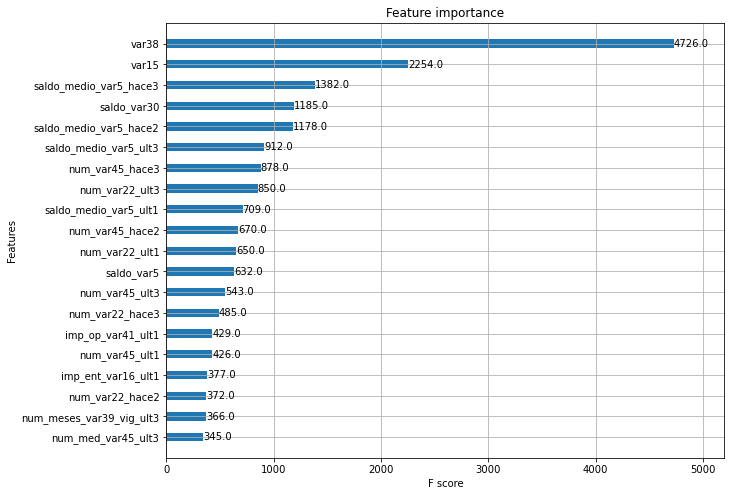

In [70]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb_clf, ax=ax , max_num_features=20,height=0.4)

## 심장병 발병 예측(Kaggle)

In [1]:
import numpy as np
import pandas as pd

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 부스팅 모델
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [17]:
!pip install optuna

  Using cached optuna-3.0.2-py3-none-any.whl (348 kB)
  Using cached alembic-1.8.1-py3-none-any.whl (209 kB)
  Using cached cliff-4.0.0-py3-none-any.whl (80 kB)
  Using cached importlib_resources-5.9.0-py3-none-any.whl (33 kB)
  Using cached Mako-1.2.3-py3-none-any.whl (78 kB)
  Using cached stevedore-4.0.0-py3-none-any.whl (49 kB)
  Using cached autopage-0.5.1-py3-none-any.whl (29 kB)
  Using cached cmd2-2.4.2-py3-none-any.whl (147 kB)
  Using cached prettytable-3.4.1-py3-none-any.whl (26 kB)
  Using cached pbr-5.10.0-py2.py3-none-any.whl (112 kB)
Processing c:\users\namyu\appdata\local\pip\cache\wheels\7f\1a\65\84ff8c386bec21fca6d220ea1f5498a0367883a78dd5ba6122\pyperclip-1.8.2-py3-none-any.whl
  Using cached pyreadline3-3.4.1-py3-none-any.whl (95 kB)


In [3]:
import optuna

In [4]:
# 교차 검증
from sklearn.model_selection import train_test_split,KFold, StratifiedKFold, RepeatedStratifiedKFold, cross_val_score, cross_val_predict, GridSearchCV

# 결측값 처리
from sklearn.impute import SimpleImputer

# 경계 설정
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # 선형 결정 경계 설정

# 데이터 전처리
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PowerTransformer
from sklearn.compose import ColumnTransformer # zkffja qusghks

# Modeling
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier

# Ensemble
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

#Pipelining
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

# 평가지표
from sklearn.metrics import accuracy_score, classification_report

In [5]:
from imblearn.over_sampling import SMOTE # 임의의 소수 클래스 데이터 사이에서 새로운 데이터를 생성

In [39]:
! pip install cufflinks

In [46]:
! pip install plotly

In [48]:
! pip install missingno

In [35]:
# 오류 발생으로 import 일단 생략할거임!!

# 오프라인 모드로 import 하기
import cufflinks as cf
cf.go_offline()
# cf_set_config_file(offline=False, world_readable=True)

import plotly
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ft

import missingno as msno # 결측치를 어떻게 시각화 할 것인가

In [7]:
import warnings
warnings.filterwarnings("ignore")

In [8]:
pd.set_option("max_columns",100)
pd.set_option("max_rows",900)
pd.set_option("max_colwidth",200)

In [9]:
df = pd.read_csv("heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [11]:
df.duplicated().sum()

0

In [12]:
def missing(df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent],axis=1, keys=["Missing_Number","Missing_Percent"])
    
    return missing_values

In [13]:
missing(df)

,Missing_Number,Missing_Percent
HeartDisease,0,0.0
ST_Slope,0,0.0
Oldpeak,0,0.0
ExerciseAngina,0,0.0
MaxHR,0,0.0
RestingECG,0,0.0
FastingBS,0,0.0
Cholesterol,0,0.0
RestingBP,0,0.0
ChestPainType,0,0.0


In [14]:
numerical = df.drop(["HeartDisease"],axis=1).select_dtypes("number").columns
categorical = df.select_dtypes("object").columns

print(f"Numerical Columns: {df[numerical].columns}")
print("\n")
print(f"categorical Columns : {df[categorical].columns}")

Numerical Columns: Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak'], dtype='object')


categorical Columns : Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')


In [15]:
df[categorical].nunique()

Sex               2
ChestPainType     4
RestingECG        3
ExerciseAngina    2
ST_Slope          3
dtype: int64

In [16]:
y = df["HeartDisease"]
print(f'Percentage of patient had a HeartDiseas : {round(y.value_counts(normalize=True)[1]*100,2)}%')
print(f'Percentage of patient had a HeartDiseas : {round(y.value_counts(normalize=True)[0]*100,2)}%')

Percentage of patient had a HeartDiseas : 55.34%
Percentage of patient had a HeartDiseas : 44.66%


In [43]:
df["HeartDisease"].iplot(kind="hist")

In [18]:
df[numerical].describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000


In [19]:
skew_limit = 0.75

skew_vals = df[numerical].drop("FastingBS", axis=1).skew()
skew_cols = skew_vals[abs(skew_vals)>skew_limit].sort_values(ascending = False)
skew_cols

Oldpeak    1.022872
dtype: float64

<AxesSubplot:>

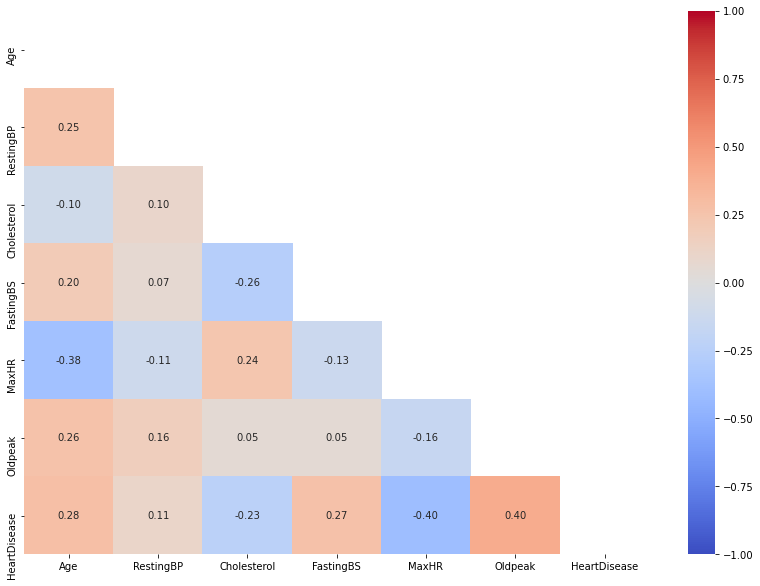

In [20]:
numerical1 = df.select_dtypes("number").columns

matrix = np.triu(df[numerical1].corr())
fig, ax = plt.subplots(figsize=(14,10))
sns.heatmap(df[numerical1].corr(), annot = True, fmt = ".2f", vmin = -1, vmax=1, center=0,
           cmap="coolwarm", mask = matrix, ax=ax)

In [21]:
df[categorical].head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up


In [22]:
print(f'A female has a probability of {round(df[df["Sex"]=="F"]["HeartDisease"].mean()*100,2)} % have a HeartDisease')
print()
print(f'A female has a probability of {round(df[df["Sex"]=="M"]["HeartDisease"].mean()*100,2)} % have a HeartDisease')
print()


A female has a probability of 25.91 % have a HeartDisease

A female has a probability of 63.17 % have a HeartDisease



In [36]:
fig = px.histogram(df, x = "Sex", color = "HeartDisease", width = 400, height=400)
fig.show()

In [37]:
df.groupby("ChestPainType")["HeartDisease"].mean().sort_values(ascending=False)

ChestPainType
ASY    0.790323
TA     0.434783
NAP    0.354680
ATA    0.138728
Name: HeartDisease, dtype: float64

In [38]:
fig = px.histogram(df, x = "ChestPainType", color = "HeartDisease", width = 400, height=400)
fig.show()

In [40]:
df.groupby("RestingECG")["HeartDisease"].mean().sort_values(ascending=False)

RestingECG
ST        0.657303
LVH       0.563830
Normal    0.516304
Name: HeartDisease, dtype: float64

In [41]:
fig = px.histogram(df, x = "RestingECG", color = "HeartDisease", width = 400, height=400)
fig.show()

In [44]:
df.groupby("ExerciseAngina")["HeartDisease"].mean().sort_values(ascending=False)

ExerciseAngina
Y    0.851752
N    0.351005
Name: HeartDisease, dtype: float64

In [91]:
fig = px.histogram(df, x = "ExerciseAngina", color = "HeartDisease", width = 400, height=400)
fig.show()

In [45]:
df.groupby("ST_Slope")["HeartDisease"].mean().sort_values(ascending=False)

ST_Slope
Flat    0.828261
Down    0.777778
Up      0.197468
Name: HeartDisease, dtype: float64

In [94]:
fig = px.histogram(df, x = "ST_Slope", color = "HeartDisease", width = 400, height=400)
fig.show()

In [80]:
accuracy = []
model_names = []

# 데이터 준비
X = df.drop("HeartDisease", axis = 1) # feature datas -> HeartDisease를 제외한 모든 columns
y = df["HeartDisease"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Encoding
ohe = OneHotEncoder()
ct = make_column_transformer((ohe,categorical),remainder="passthrough")

# 모델 생성
model = DummyClassifier(strategy = "constant", constant = 1)
pipe = make_pipeline(ct, model)
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
accuracy.append(round(accuracy_score(y_test, y_pred),4))
print(f'model : {model} and accuracy score is : {round(accuracy_score(y_test, y_pred),4)}')

# 결과 
model_names = ["DummyClassifier"]
dummy_result_df = pd.DataFrame({"Accuracy":accuracy}, index = model_names)
dummy_result_df

model : DummyClassifier(constant=1, strategy='constant') and accuracy score is : 0.5942


,Accuracy
DummyClassifier,0.5942


In [81]:
accuracy = []
model_names = []

# 데이터 준비
X = df.drop("HeartDisease", axis = 1) # feature datas -> HeartDisease를 제외한 모든 columns
y = df["HeartDisease"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Encoding
ohe = OneHotEncoder()
ct = make_column_transformer((ohe,categorical),remainder="passthrough") # sclaer 적용 x

# modeling
lr = LogisticRegression(solver="liblinear")
lda = LinearDiscriminantAnalysis()
svm = SVC(gamma = "scale")


models = [lr, lda, svm]

# 각 모델별로 작업 진행
for model in models :
    pipe = make_pipeline(ct, model)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    accuracy.append(round(accuracy_score(y_test, y_pred),4))
    print(f'model : {model} and accuracy score is : {round(accuracy_score(y_test, y_pred),4)}')

# 결과 
model_names = ["Logistic","LinearDiscriminant","SVM"]
result_df1 = pd.DataFrame({"Accuracy":accuracy}, index = model_names)
result_df1

# KNeighborsClassifier... knn은 오류나서 일단 해당 부분 없애고 코드 작성!

model : LogisticRegression(solver='liblinear') and accuracy score is : 0.8841
model : LinearDiscriminantAnalysis() and accuracy score is : 0.8696
model : SVC() and accuracy score is : 0.7246


,Accuracy
Logistic,0.8841
LinearDiscriminant,0.8696
SVM,0.7246


In [82]:
#knn 오류로 일단 빼고 코드 돌림!
accuracy = []
model_names = []

# 데이터 준비
X = df.drop("HeartDisease", axis = 1) # feature datas -> HeartDisease를 제외한 모든 columns
y = df["HeartDisease"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Encoding
ohe = OneHotEncoder()
s = StandardScaler()
ct1 = make_column_transformer((ohe,categorical),(s, numerical))

# modeling
lr = LogisticRegression(solver="liblinear")
lda = LinearDiscriminantAnalysis()
svm = SVC(gamma = "scale")


models = [lr, lda, svm]

# 각 모델별로 작업 진행
for model in models :
    pipe = make_pipeline(ct1, model)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    accuracy.append(round(accuracy_score(y_test, y_pred),4))
    print(f'model : {model} and accuracy score is : {round(accuracy_score(y_test, y_pred),4)}')

# 결과 
model_names = ["Logistic","LinearDiscriminant","SVM"]
result_df2 = pd.DataFrame({"Accuracy":accuracy}, index = model_names)
result_df2

model : LogisticRegression(solver='liblinear') and accuracy score is : 0.8804
model : LinearDiscriminantAnalysis() and accuracy score is : 0.8696
model : SVC() and accuracy score is : 0.8841


,Accuracy
Logistic,0.8804
LinearDiscriminant,0.8696
SVM,0.8841


In [83]:
accuracy = []
model_names = []

# 데이터 준비
X = df.drop("HeartDisease", axis = 1) # feature datas -> HeartDisease를 제외한 모든 columns
y = df["HeartDisease"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Encoding
ohe = OneHotEncoder()
ct = make_column_transformer((ohe,categorical),remainder="passthrough") # sclaer 적용 x

# modeling
ada = AdaBoostClassifier(random_state = 0) # 오류 데이터에 가중치를 부여하면서 부스팅 수행
gb = GradientBoostingClassifier(random_state=0) # 경사 하강법을 이용하여 가중치 업데이트
rf = RandomForestClassifier(random_state=0) # 결정 트리 기반 배깅 알고리즘, 약한 학습기들을 생성한 후 이를 선형 결합하여 최종 학습기 생성
et = ExtraTreesClassifier(random_state=0) # 결정 트리 기반 배깅 알고리즘, 훈련에 사용할 특성과 임계값을 무작위로 선택 후 최적 선택.


models = [ada,gb,rf,et]

# 각 모델별로 작업 진행
for model in models :
    pipe = make_pipeline(ct, model)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    accuracy.append(round(accuracy_score(y_test, y_pred),4))
    print(f'model : {model} and accuracy score is : {round(accuracy_score(y_test, y_pred),4)}')

# 결과 
model_names = ["Ada","Gradient","Random","ExtraTree"]
result_df3 = pd.DataFrame({"Accuracy":accuracy}, index = model_names)
result_df3

model : AdaBoostClassifier(random_state=0) and accuracy score is : 0.8659
model : GradientBoostingClassifier(random_state=0) and accuracy score is : 0.8768
model : RandomForestClassifier(random_state=0) and accuracy score is : 0.8877
model : ExtraTreesClassifier(random_state=0) and accuracy score is : 0.8804


,Accuracy
Ada,0.8659
Gradient,0.8768
Random,0.8877
ExtraTree,0.8804


In [84]:
accuracy = []
model_names = []

# 데이터 준비
X = df.drop("HeartDisease", axis = 1) # feature datas -> HeartDisease를 제외한 모든 columns
y = df["HeartDisease"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Encoding
ohe = OneHotEncoder()
ct = make_column_transformer((ohe,categorical),remainder="passthrough") # sclaer 적용 x

# modeling
xgbc = XGBClassifier(random_state=0)
lgbmc = LGBMClassifier(random_state=0)

models = [xgbc, lgbmc]

# 각 모델별로 작업 진행
for model in models :
    pipe = make_pipeline(ct, model)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    accuracy.append(round(accuracy_score(y_test, y_pred),4))
    print(f'model : {model} and accuracy score is : {round(accuracy_score(y_test, y_pred),4)}')

# 결과 
model_names = ["XGBoost","LightGBM"]
result_df4 = pd.DataFrame({"Accuracy":accuracy}, index = model_names)
result_df4

model : XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...) and accuracy score is : 0.8297
model : LGBMClassifier(random_state=0) and accuracy score is : 0.8732


,Accuracy
XGBoost,0.8297
LightGBM,0.8732


In [85]:
accuracy = []
model_names = []

# 데이터 준비
X = df.drop("HeartDisease", axis = 1)
y = df["HeartDisease"]
categorical_features_indices = np.where(X.dtypes != np.float)[0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# modeling
model = CatBoostClassifier(verbose = False, random_state = 0)

# 각 모델별로 작업 진행
model.fit(X_train, y_train,cat_features=categorical_features_indices, eval_set=(X_test, y_test))
y_pred = model.predict(X_test)
accuracy.append(round(accuracy_score(y_test, y_pred),4))

# 결과 
model_names = ["Catboost_default"]
result_df5 = pd.DataFrame({"Accuracy":accuracy}, index = model_names)
result_df5

,Accuracy
Catboost_default,0.8804


In [86]:
def objective(trial):
    X = df.drop("HeartDisease", axis = 1)
    y = df["HeartDisease"]
    categorical_features_indices = np.where(X.dtypes != np.float)[0]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
    
    # tuning을 진행할 hyper parameters 설정
    param = {
        "objective":trial.suggest_categorical("objective",["Logloss","CrossEntropy"]),
        "colsample_bylevel" : trial.suggest_float("colsample_bylevel",0.01,0.1),
        "depth":trial.suggest_int("depth",1,12),
        "boosing_type":trial.suggest_categorical("boosting_type",["Ordered","Plain"]),
        "bootstrap_type":trial.suggest_Categorical("bootstrap_type",["Bayesian","Bernoulli","MVS"]),
        "used_ram_limit" : "3gb"
    }
    if param["bootstrap_type"] == "Bayesian":
        param["bagging_temperature"] = trial.suggest_float("bagging_temperature",0,10)
    elif param["bootstrap_type"] == Bernoulli:
        param["subsample"] = trial.suggest_float("subsample",0.1,1)
    
    cat_cls = CatBoostClassifier(**param)
    cat_clsf.fit(X_train, y_train, eval_set = [(X_test, y_test)], cat_features = categorical_features_indices, 
                verbose = 0, early_stopping_rounds = 100)
    preds = cat_cls.predict(X_test)
    pred_labels = np.rint(preds)
    accuracy = accuracy_score(y_test, pred_labels)
    return accuracy

In [87]:
if __name__ == "__mani__":
    study = optuna.create_study(difection="maximize")
    study.optimize(objective, n_trials=50, timeout=600)
    
    print("Number of finished trials : {}".format(len(study.trials)))
    print("Best trial:")
    trial = study.best_trial
    print("Value:{}".format(trial.value))
    print("Params:")
    for key, value in trial.params.items():
        print(" {} : {}".format(key, value))

In [88]:
accuracy = []
model_names = []

# 데이터 준비
X = df.drop("HeartDisease", axis = 1)
y = df["HeartDisease"]
categorical_features_indices = np.where(X.dtypes != np.float)[0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# modeling
model = CatBoostClassifier(verbose=False, random_state=0,
                          objective='CrossEntropy',
                          colsample_bylevel = 0.4292240490294766,
                          depth = 10,
                          boosting_type = "Plain",
                          bootstrap_type = "MVS")

model.fit(X_train, y_train,cat_features=categorical_features_indices, eval_set=(X_test, y_test))
y_pred = model.predict(X_test)
accuracy.append(round(accuracy_score(y_test, y_pred),4))
print(classification_report(y_test, y_pred))

# 결과 
model_names = ["Catboost_tuned"]
result_df6 = pd.DataFrame({"Accuracy":accuracy}, index = model_names)
result_df6

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       112
           1       0.91      0.88      0.89       164

    accuracy                           0.88       276
   macro avg       0.87      0.88      0.87       276
weighted avg       0.88      0.88      0.88       276



,Accuracy
Catboost_tuned,0.8768


In [89]:
feature_importance = np.array(model.get_feature_importance())
features = np.array(X_train.columns)
fi = {'features':features, "feature_importance":feature_importance}
df_fi = pd.DataFrame(fi)
df_fi.sort_values(by=["feature_importance"],ascending=True, inplace=True)
fig = px.bar(df_fi, x="feature_importance",y="features",title="CatBoost Feature importance",height=500)
fig.show()

In [90]:
result_final = pd.concat([dummy_result_df, result_df1, result_df2, result_df3, result_df4, result_df5, result_df6],axis=0)

In [91]:
result_final.sort_values(by=["Accuracy"],ascending = True, inplace = True)
fig = px.bar(result_final, x="Accuracy",y=result_final.index,title="Model Comparison",
             height=600, labels = {"index":"MODELS"})
fig.show()
# 그림이 조금 다른 것 같네...